In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('/content/fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


In [3]:
df = df.drop('isFlaggedFraud', axis=1)

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0


In [5]:
pd.set_option('display.max_rows', None)
df[df['isFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
680,1,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.00,C339924917,6268.00,12145.85,1
724,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.00,9291619.62,1
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.00,C431687661,0.00,0.00,1
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.00,C716083600,0.00,2444985.19,1
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.00,C1136419747,0.00,0.00,1


Variables numéricas: 7


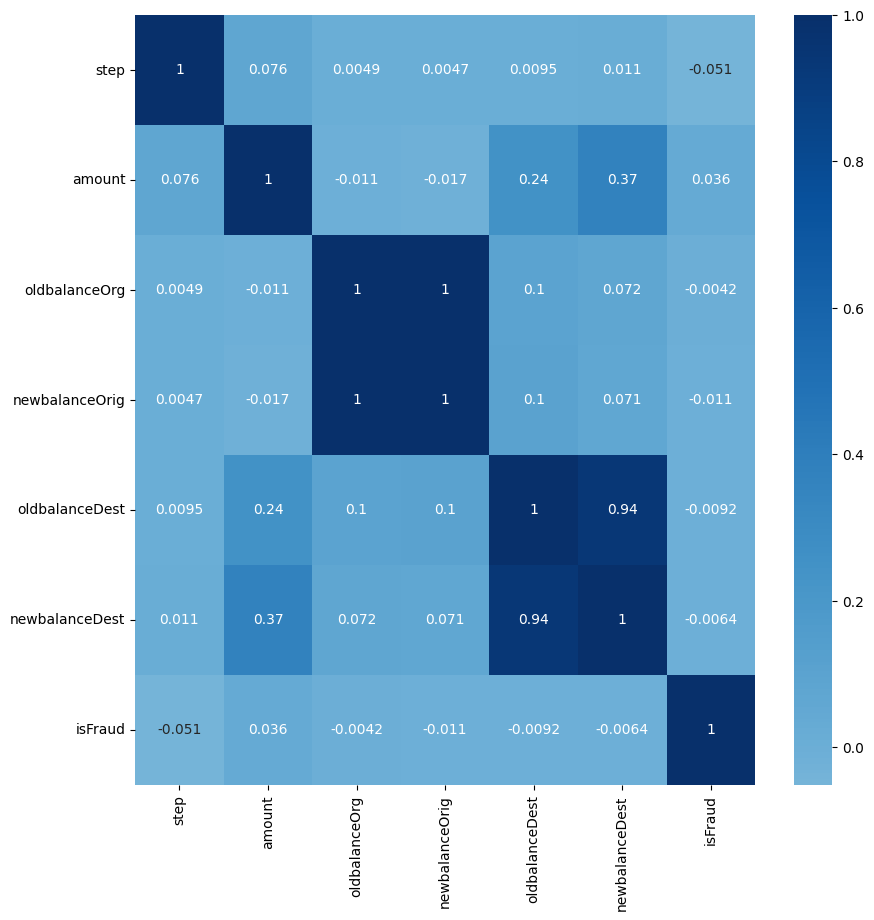

In [6]:
num_var = [var for var in df.columns if df[var].dtypes not in ['O', 'object']]
print("Variables numéricas:", len(num_var))
corr_data = df[num_var].corr()
plt.figure(figsize=[10,10])
sns.heatmap(corr_data, annot= True, cmap = 'Blues', center = 0)
plt.show()

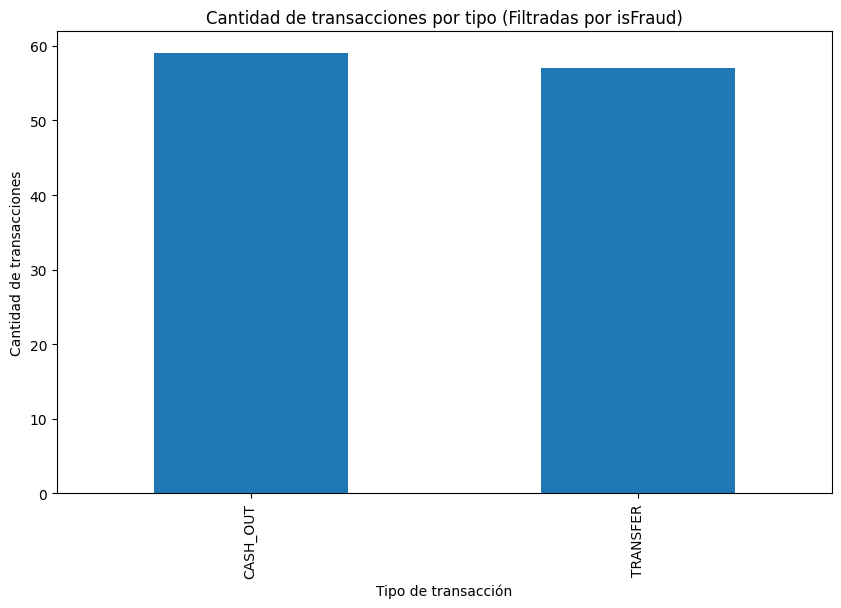

In [7]:
datos_filtrados = df[df['isFraud'] == 1]

plt.figure(figsize=(10, 6))
transaction_counts = datos_filtrados['type'].value_counts()
transaction_counts.plot(kind='bar')
plt.xlabel('Tipo de transacción')
plt.ylabel('Cantidad de transacciones')
plt.title('Cantidad de transacciones por tipo (Filtradas por isFraud)')
plt.show()

# Vamos a entrenar tres tipos de modelos para encontrar cual puede ser la mejor solucion

## Comenzamos con LogisticRegression

In [11]:
X = pd.get_dummies(df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1))
y = df['isFraud']

sampler = RandomUnderSampler(sampling_strategy=0.7, random_state=11001)
X_samp, y_samp = sampler.fit_resample(X, y)

balance = SMOTE(random_state=11001)
X_samp, y_samp = balance.fit_resample(X_samp, y_samp)

X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.2, random_state=11001)

model = LogisticRegression(
    penalty='l2', #penalizacion para los errores
    C=10, #Regularizacion
    solver='lbfgs', #Limited-memory Broyden-Fletcher-Goldfarb-Shanno
    random_state=11001
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 31
False Positives: 7
False Negatives: 1
True Positives: 27


## Podemos ver unos buenos resultados, tan solo no detecta bien una transaccion

## Ahora vamos con RandomForestClassifier

In [12]:
X = pd.get_dummies(df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1))
y = df['isFraud']

sampler = RandomUnderSampler(sampling_strategy=0.7, random_state=11001)
X_samp, y_samp = sampler.fit_resample(X, y)
smote = SMOTE(random_state=11001)
X_samp, y_samp = smote.fit_resample(X_samp, y_samp)
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.2, random_state=11001)

model = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    random_state=11001
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 35
False Positives: 3
False Negatives: 1
True Positives: 27


## Obvservamos comportamientos muy similares, vemos, eso si, una fuerte reduccion en los falsos positivos detectados frente al modelo anterior

## Vamos con el ultimo, usaremos un Support Vector Machine classifier

In [13]:
X = pd.get_dummies(df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1))
y = df['isFraud']

sampler = RandomUnderSampler(sampling_strategy=0.7, random_state=11001)
X_samp, y_samp = sampler.fit_resample(X, y)
smote = SMOTE(random_state=11001)
X_samp, y_samp = smote.fit_resample(X_samp, y_samp)
X_train, X_test, y_train, y_test = train_test_split(X_samp, y_samp, test_size=0.2, random_state=11001)

model = SVC(
    kernel='rbf',
    random_state=11001
    )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 7
False Positives: 31
False Negatives: 1
True Positives: 27
